# Intro

## Pain
สมมติเรามีรูปนึง ขนาด 100x100 pixel ถ้าเราจะทำ classification ด้วย logistic regression โดยให้แต่ละ pixel ของรูปเป็น feature ประกอบการพิจารณา จะได้ว่ามี feature $10^4$ ตัว แล้วดูทรงเส้น decision boundary น่าจะเป็นแบบ non-linear ต้องพิจารณาฟีเจอร์แบบ Quadatic ($\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1^2 + ...$) ซึ่งทำแล้วจะมีจะมีฟีเจอร์ทั้งหมดประมาณนี้

In [185]:
n = 10000
x = n+n*(n+1)/2 # number of feature
print(x)

50015000.0


#### Note : 

ถ้ามี 2 features ทำ Quadatic จะได้ : $\theta_0 + \theta_1x_1 + \theta_2x_2+\theta_3x_1x_2 + \theta_4x_1^2 + \theta_5x_2^2$ --> มีฟีเจอร์เพิ่มมา 3 ตัว (2+1) + 2 (feature ตั้งต้น)เป็น 5 ตัว

ถ้ามี 3 features ทำ Quadatic จะได้ : $\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3  + \theta_1x_1x_2 + \theta_1x_1x_3 + \theta_1x_2x_3 + \theta_1x_1^2 + \theta_1x_2^2 + \theta_3x_3^2$ --> มีฟีเจอร์เพิ่มมา 6 ตัว (3+2+1) + 3 (feature ตั้งต้น)เป็น 5 ตัว

$\vdots$

จะได้สูตรของการหาจำนวน feature ทั้งหมดถ้าทำ Quadatic คือ $n + \{n+(n-1)+(n-2)+\cdots+1\} = n + \frac{n(n+1)}{2}$ 


# Model Representation I

Let's examine how we will represent a hypothesis function using neural networks. At a very simple level, neurons are basically computational units that take inputs (**dendrites**) as electrical inputs (called "spikes") that are channeled to outputs (**axons**). In our model, our dendrites are like the input features $x_1 \cdots x_n$, and the output is the result of our hypothesis function. 

In this model our $x_0$ input node is sometimes called the "bias unit." It is always equal to 1. 

In neural networks, we use the same logistic function as in classification, $\frac{1}{1+e^{−\theta^Tx}}$, yet we sometimes call it a sigmoid (logistic) **activation** function. In this situation, our "theta" parameters are sometimes called **"weights"**.

Visually, a simplistic representation looks like:

$\begin{bmatrix}x_0 \newline x_1 \newline x_2 \newline \end{bmatrix}\rightarrow\begin{bmatrix}\ \ \ \newline \end{bmatrix}\rightarrow h_\theta(x)$

Our input nodes (layer 1), also known as the "input layer", go into another node (layer 2), which finally outputs the hypothesis function, known as the "output layer".

We can have intermediate layers of nodes between the input and output layers called the **"hidden layers."**

In this example, we label these intermediate or "hidden" layer nodes $a^2_0 \cdots a^2_n$ and call them "activation units."

$\begin{align*}& a_i^{(j)} = \text{"activation" of unit $i$ in layer $j$} \newline& \Theta^{(j)} = \text{matrix of weights controlling function mapping from layer $j$ to layer $j+1$}\end{align*}$

If we had one hidden layer, it would look like:

$\begin{bmatrix}x_0 \newline x_1 \newline x_2 \newline x_3\end{bmatrix}\rightarrow\begin{bmatrix}a_1^{(2)} \newline a_2^{(2)} \newline a_3^{(2)} \newline \end{bmatrix}\rightarrow h_\theta(x)$

The values for each of the "activation" nodes is obtained as follows:

$\begin{align*} a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \newline a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \newline a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \newline \end{align*}$

ได้ว่า พารามิเตอร์ $\Theta^{(1)} = \begin{bmatrix} \Theta_{10}^{(1)} & \Theta_{11}^{(1)} & \Theta_{12}^{(1)} & \Theta_{13}^{(1)} \newline \Theta_{20}^{(1)} & \Theta_{21}^{(1)} & \Theta_{22}^{(1)} & \Theta_{23}^{(1)} \newline \Theta_{30}^{(1)} & \Theta_{31}^{(1)} & \Theta_{32}^{(1)} & \Theta_{33}^{(1)} \end{bmatrix} \in \mathbb{R}^{3x4}$

และ

$h_\Theta(x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}) $

ได้ว่า พารามิเตอร์ $\Theta^{(2)} = \begin{bmatrix} \Theta_{10}^{(2)} & \Theta_{11}^{(2)} & \Theta_{12}^{(2)} & \Theta_{13}^{(2)} \end{bmatrix} \in \mathbb{R}^{1x4}$ (มีรวมส่วนพารามิเตอร์จาก "bias unit." ด้วย)

This is saying that we compute our activation nodes by using a 3×4 matrix of parameters. We apply each row of the parameters to our inputs to obtain the value for one activation node. Our hypothesis output is the logistic function applied to the sum of the values of our activation nodes, which have been multiplied by yet another parameter matrix $\Theta^{(2)}$ containing the weights for our second layer of nodes.

Each layer gets its own matrix of weights, $\Theta^{(j)}$.

The dimensions of these matrices of weights is determined as follows:

## $\text{If network has $s_j$ units in layer $j$ and $s_{j+1}$ units in layer $j+1$, then $\Theta^{(j)}$ will be of dimension $s_{j+1} \times (s_j + 1)$.}$

The +1 comes from the addition in $\Theta^{(j)}$ of the "bias nodes," $x_0$ and $\Theta^{(j)}_0$. In other words the output nodes will not include the bias nodes while the inputs will. The following image summarizes our model representation:
![](img/32.png)

Example: If layer 1 has 2 input nodes and layer 2 has 4 activation nodes. Dimension of $\Theta^{(1)}$ is going to be 4×3 where $s_j=2$ and $s_{j+1}=4$, so $s_{j+1}×(s_j+1)=4×3$.


# Model Representation II

To re-iterate, the following is an example of a neural network:

$\begin{align*} a_1^{(2)} = g(\Theta_{10}^{(1)}x_0 + \Theta_{11}^{(1)}x_1 + \Theta_{12}^{(1)}x_2 + \Theta_{13}^{(1)}x_3) \newline a_2^{(2)} = g(\Theta_{20}^{(1)}x_0 + \Theta_{21}^{(1)}x_1 + \Theta_{22}^{(1)}x_2 + \Theta_{23}^{(1)}x_3) \newline a_3^{(2)} = g(\Theta_{30}^{(1)}x_0 + \Theta_{31}^{(1)}x_1 + \Theta_{32}^{(1)}x_2 + \Theta_{33}^{(1)}x_3) \newline h_\Theta(x) = a_1^{(3)} = g(\Theta_{10}^{(2)}a_0^{(2)} + \Theta_{11}^{(2)}a_1^{(2)} + \Theta_{12}^{(2)}a_2^{(2)} + \Theta_{13}^{(2)}a_3^{(2)}) \newline \end{align*}$

In this section we'll do a vectorized implementation of the above functions. We're going to define a new variable $z^{(j)}_k$ that encompasses the parameters inside our $g$ function. In our previous example if we replaced by the variable $z$ for all the parameters we would get:

$\begin{align*}a_1^{(2)} = g(z_1^{(2)}) \newline a_2^{(2)} = g(z_2^{(2)}) \newline a_3^{(2)} = g(z_3^{(2)}) \newline \end{align*}$

In other words, for layer $j=2$ and node $k$, the variable $z$ will be:

$z_k^{(2)} = \Theta_{k,0}^{(1)}x_0 + \Theta_{k,1}^{(1)}x_1 + \cdots + \Theta_{k,n}^{(1)}x_n$

The vector representation of $x$ and $z^j$ is:

$\begin{align*}x = \begin{bmatrix}x_0 \newline x_1 \newline\cdots \newline x_n\end{bmatrix} &z^{(j)} = \begin{bmatrix}z_1^{(j)} \newline z_2^{(j)} \newline\cdots \newline z_n^{(j)}\end{bmatrix}\end{align*}$

Setting $x=a^{(1)}$, we can rewrite the equation as:

$z^{(j)} = \Theta^{(j-1)}a^{(j-1)}$

We are multiplying our matrix $\Theta^{(j-1)}$ with dimensions $s_j×(n+1)$ (where $s_j$ is the number of our activation nodes) by our vector $a^{(j−1)}$ with height (n+1). This gives us our vector $z^{(j)}$ with height $s_j$. Now we can get a vector of our activation nodes for layer $j$ as follows:

$a^{(j)} = g(z^{(j)})$

Where our function $g$ can be applied element-wise to our vector $z^{(j)}$.

We can then add a bias unit (equal to 1) to layer j after we have computed $a^{(j)}$. This will be element $a^{(j)}_0$ and will be equal to 1. To compute our final hypothesis, let's first compute another $z$ vector:

$z^{(j+1)} = \Theta^{(j)}a^{(j)}$

We get this final $z$ vector by multiplying the next theta matrix after $\Theta^{(j−1)}$ with the values of all the activation nodes we just got. This last theta matrix $\Theta^{(j)}$ will have only one row which is multiplied by one column $a^{(j)}$ so that our result is a single number. We then get our final result with:

$h_\Theta(x) = a^{(j+1)} = g(z^{(j+1)})$

Notice that in this **last step**, between layer $j$ and layer $j+1$, we are doing **exactly the same thing** as we did in logistic regression. Adding all these intermediate layers in neural networks allows us to more elegantly produce interesting and more complex non-linear hypotheses.

# Examples and Intuitions I

A simple example of applying neural networks is by predicting $x_1$ AND $x_2$, which is the logical 'and' operator and is only true if both $x_1$ and $x_2$ are 1.

The graph of our functions will look like:

$\begin{align*}\begin{bmatrix}x_0 \newline x_1 \newline x_2\end{bmatrix} \rightarrow\begin{bmatrix}g(z^{(2)})\end{bmatrix} \rightarrow h_\Theta(x)\end{align*}$

Remember that $x_0$ is our bias variable and is always 1.

Let's set our first theta matrix as:

$\Theta^{(1)} =\begin{bmatrix}-30 & 20 & 20\end{bmatrix}$

This will cause the output of our hypothesis to only be positive if both $x_1$ and $x_2$ are 1. In other words:

$\begin{align*}& h_\Theta(x) = g(-30 + 20x_1 + 20x_2) \newline \newline & x_1 = 0 \ \ and \ \ x_2 = 0 \ \ then \ \ g(-30) \approx 0 \newline & x_1 = 0 \ \ and \ \ x_2 = 1 \ \ then \ \ g(-10) \approx 0 \newline & x_1 = 1 \ \ and \ \ x_2 = 0 \ \ then \ \ g(-10) \approx 0 \newline & x_1 = 1 \ \ and \ \ x_2 = 1 \ \ then \ \ g(10) \approx 1\end{align*}$

So we have constructed one of the fundamental operations in computers by using a small neural network rather than using an actual AND gate. Neural networks can also be used to simulate all the other logical gates. The following is an example of the logical operator 'OR', meaning either $x_1$ is true or $x_2$ is true, or both:

![](img/33.png)

Where $g(z)$ is the following:

![](img/34.png)

### สรูปคือ ใช้ Neural Network สร้าง AND OR gate ขึ้นมา ... ซึ่งแน่นอนว่าสามารถนำไปใช้กับ logic ที่ซับซ้อนกว่านี้ได้เช่นกัน

# Examples and Intuitions II

The $Θ^{(1)}$ matrices for AND, NOR, and OR are:

$\begin{align*}AND:\newline\Theta^{(1)} &=\begin{bmatrix}-30 & 20 & 20\end{bmatrix} \newline NOR:\newline\Theta^{(1)} &= \begin{bmatrix}10 & -20 & -20\end{bmatrix} \newline OR:\newline\Theta^{(1)} &= \begin{bmatrix}-10 & 20 & 20\end{bmatrix} \newline\end{align*}$

We can combine these to get the XNOR logical operator (which gives 1 if $x_1$ and $x_2$ are both 0 or both 1).

$\begin{align*}\begin{bmatrix}x_0 \newline x_1 \newline x_2\end{bmatrix} \rightarrow\begin{bmatrix}a_1^{(2)} \newline a_2^{(2)} \end{bmatrix} \rightarrow\begin{bmatrix}a^{(3)}\end{bmatrix} \rightarrow h_\Theta(x)\end{align*}$

For the transition between the first and second layer, we'll use a $Θ^{(1)}$ matrix that combines the values for AND and NOR:

$\Theta^{(1)} =\begin{bmatrix}-30 & 20 & 20 \newline 10 & -20 & -20\end{bmatrix}$

For the transition between the second and third layer, we'll use a $Θ^{(2)}$ matrix that uses the value for OR:

$\Theta^{(2)} =\begin{bmatrix}-10 & 20 & 20\end{bmatrix}$

Let's write out the values for all our nodes:

$\begin{align*}& a^{(2)} = g(\Theta^{(1)} \cdot x) \newline& a^{(3)} = g(\Theta^{(2)} \cdot a^{(2)}) \newline& h_\Theta(x) = a^{(3)}\end{align*}$

And there we have the XNOR operator using a hidden layer with two nodes! The following summarizes the above algorithm:

![](img/35.png)

# Multiclass Classification

To classify data into multiple classes, we let our hypothesis function return a vector of values. Say we wanted to classify our data into one of four categories. We will use the following example to see how this classification is done. This algorithm takes as input an image and classifies it accordingly:
![](img/36.png)

We can define our set of resulting classes as y:

![](img/37.png)

Each $y^{(i)}$ represents a different image corresponding to either a car, pedestrian, truck, or motorcycle. The inner layers, each provide us with some new information which leads to our final hypothesis function. The setup looks like:

![](img/38.png)

Our resulting hypothesis for one set of inputs may look like:

$h_\Theta(x) =\begin{bmatrix}0 \newline 0 \newline 1 \newline 0 \newline\end{bmatrix}$

In which case our resulting class is the third one down, or $h_\Theta(x)_3$, which represents the motorcycle.

# ====================== CODE =========================

# Multi-class Classification (Multivariate Logistic Regression)

In [3]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  

%matplotlib inline

data = loadmat('programing/machine-learning-ex3/ex3/ex3data1.mat')

# มีรูปขนาด 20x20 pixel 5000 รูป โดยเก็บสีของแต่ละรูปแบบ gray scale ไว้แต่ละ row ของ X (400 pixel)
# และเก็บผลเฉลยว่ารูปแสดงถึงเลขอะไร (1-10 โดยที่ 10 แทนเลข 0) ไว้ใน y

img_row = data['X']
number = data['y']

In [4]:
img_row.shape, number.shape

((5000, 400), (5000, 1))

# ตัวอย่างค่าจาก Y

In [5]:
number[0:10]

array([[10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10],
       [10]], dtype=uint8)

# ตัวอย่างรูปจาก X

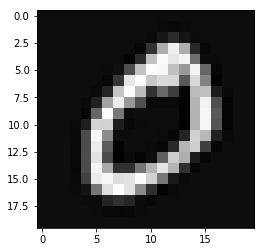

In [6]:
img_matrix = img_row[0].reshape((20, 20)).T
plt.imshow(img_matrix, cmap='gray')
plt.show()

# แสดง sample รูปบางส่วน

In [7]:
# สุ่มหยิบรูปจาก 5000 รูป เอาแค่ 100
number_of_img = 100
def displayData(img_row,img_number):
    rand_indices = np.random.permutation(len(img_row)) # rand 0-5000
    sample = img_row[rand_indices[0:img_number]] # get sample

    side = img_number**(1/2)
    if (side).is_integer() :
        side = (int)(side)
        space_3d = np.zeros((side*20,side*20))
        for i in range(side):
            row_num = side*i
            for j in range(side):
                space_3d[20*i:20*i+20,j*20:20*j+20] = sample[row_num+j].reshape((20,20)).T

        plt.imshow(space_3d, cmap='gray')
        plt.show()
    else:
        print("Sqrt of number should be integer")

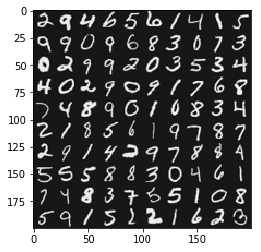

In [8]:
displayData(img_row,100)

# Function พื้นฐานที่ต้องใช้

- sigmoid
- ใช้หาค่าของ cost function และ vector gradient ของ Logistic Regression แบบทำ Regularization ด้วย

In [16]:
def sigmoid(z):  
    g = 1/(1+np.exp(-z))
    return g

def lrCostFunction(theta, X, y, learningRate):  
    theta = np.matrix(theta) # nx1
    X = np.matrix(X) # m x n
    y = np.matrix(y).astype(int) # m x 1
    m = len(y) 
    
    # -------- Cost -----------    
    # Unregularizing
    J = 0
    h = sigmoid(X.dot(theta))
    first = (-y.T).dot(np.log(h))
    second = (-(1 - y).T).dot(np.log(1 - h))
    J = J + (1/m)*(first + second)
    # Regularizing
    reg = (learningRate/(2*m))*(theta[1:theta.shape[0]].T).dot(theta[1:theta.shape[0]])[0,0]
    J = J + reg
#     # -------- Grad -----------
    # Unregularizing
    errorhy = h-y
    grad = (1/m)*(X.T).dot(errorhy)
    # Regularizing
    zero = np.matrix([0])
    reg_term = np.vstack((zero,(learningRate/m)*theta[1:theta.shape[0]]))
    grad = grad + reg_term
    
    return [J,grad]

Testing lrCostFunction() with regularization

ถ้าทดสอบด้วย
- theta_t = [-2; -1; 1; 2];
- X_t = [ones(5,1) reshape(1:15,5,3)/10];
- y_t = ([1;0;1;0;1] >= 0.5);
- lambda_t = 3;

จะได้
- Expected cost: 2.534819
- Expected gradients: [ 0.146561 -0.548558 0.724722 1.398003 ].T

In [18]:
# ตัวแปรทดสอบฟังก์ชั่น
theta_t = np.matrix([-2,-1,1,2]).T
ones = np.ones((5,1))
rand = np.arange(1,16).reshape((3, 5)).T/10
X_t = np.hstack((ones,rand))
y_t = np.matrix([1,0,1,0,1]).T >= 0.5
lambda_t = 3

[J,grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t)
print(J)
print(grad)

[[ 2.5348194]]
[[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]


ถึงจุดนี้ Cost Function กับ Gradient ทำงานถูกต้องแล้ว แต่เพื่อให้ใช้งานกับ `opt.fmin_tnc(..)` ได้ ต้องแยกฟังชั่นกัน 

In [102]:
def cost(theta, X, y, learningRate):  
    theta = np.matrix(theta).T # theta ต้องนอนเข้ามาเป็น 1xn แล้วทำให้เป็น nx1 
    X = np.matrix(X) # m x n
    y = np.matrix(y).astype(int) # m x 1
    m = len(y) 
    
    # -------- Cost -----------    
    # Unregularizing
    J = 0
    h = sigmoid(X.dot(theta))
    first = (-y.T).dot(np.log(h))
    second = (-(1 - y).T).dot(np.log(1 - h))
    J = J + (1/m)*(first + second)
    # Regularizing
    reg = (learningRate/(2*m))*(theta[1:theta.shape[0]].T).dot(theta[1:theta.shape[0]])[0,0]
    J = J + reg
    return J[0,0]

In [103]:
def grad(theta, X, y, learningRate):
    theta = np.matrix(theta).T # theta ต้องนอนเข้ามาเป็น 1xn แล้วทำให้เป็น nx1 
    X = np.matrix(X) # m x n
    y = np.matrix(y).astype(int) # m x 1
    m = len(y)
    
    h = sigmoid(X.dot(theta))
    # -------- Grad -----------
    # Unregularizing
    errorhy = h-y
    grad = (1/m)*(X.T).dot(errorhy)
    # Regularizing
    zero = np.matrix([0])
    reg_term = np.vstack((zero,(learningRate/m)*theta[1:theta.shape[0]]))
    grad = grad + reg_term
    
    return grad.tolist()

In [104]:
cost(theta_t.T, X_t, y_t, lambda_t)

2.5348193961097438

In [105]:
grad(theta_t.T, X_t, y_t, lambda_t)

[[0.14656136792489802],
 [-0.5485584118531603],
 [0.7247222721092885],
 [1.3980029560717375]]

# One-vs-All Classification

ใช้ Logistic Regression แยกกลุ่มรูป 0-9 โดยที่คิดแบบแยกทีละเลข

เช่น ถ้าพิจารณาที่รูปของเลข 1 ก็ให้อะไรที่เป็นเลข 1 มี $y_i=1$ ส่วนเลขอื่นๆ 2,3,4,...,9 มี $y_i=0$

ทำซ้ำๆทีละเลขตั้งแต่ 0-9 ให้ครบทุกเลข เพื่อหาพารามิเตอร์ $\theta$ ของแต่ละเลข 

In [123]:
import scipy.optimize as opt

def oneVsAll(X,y,num_labels, learningRate):
    # ONEVSALL trains multiple logistic regression classifiers and returns all
    # the classifiers in a matrix all_theta, where the i-th row of all_theta 
    # corresponds to the classifier for label i
    #   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
    #   logistic regression classifiers and returns each of these classifiers
    #   in a matrix all_theta, where the i-th row of all_theta corresponds 
    #   to the classifier for label i

    X = np.matrix(X) # m x n
    y = np.matrix(y) # m x 1
    
    # Add ones to the X data matrix
    m = X.shape[0]
    ones = np.ones((m,1))
    X = np.hstack((ones,X))
    n = X.shape[1]
    
    # You need to return the following variables correctly 
    all_theta = np.zeros((num_labels, n))
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: You should complete the following code to train num_labels
    #               logistic regression classifiers with regularization
    #               parameter lambda. 
    #
    # Hint: theta(:) will return a column vector.
    #
    # Hint: You can use y == c to obtain a vector of 1's and 0's that tell you
    #       whether the ground truth is true/false for this class.
    #
    # Note: For this assignment, we recommend using fmincg to optimize the cost
    #       function. It is okay to use a for-loop (for c = 1:num_labels) to
    #       loop over the different classes.
    
    initial_theta = np.zeros((1,n))

    # หาพารามิเตอร์ของเลข 0,1,2,...,9
    for c in range(0,num_labels):
        yi = (y==c+1).astype(int)
        result = opt.fmin_tnc(func=cost, x0=initial_theta, fprime=grad, args=(X,yi,learningRate))  
        theta = np.matrix(result[0])
        all_theta[c,0:all_theta.shape[1]] = theta;

    return all_theta

In [124]:
all_theta = oneVsAll(img_row, number, 10, 0.1); # num_labels = 1-10

In [125]:
all_theta

array([[ -3.07461901e+00,   0.00000000e+00,   0.00000000e+00, ...,
          6.82331248e-03,  -5.34096695e-12,   0.00000000e+00],
       [ -3.73282608e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.33336406e-02,  -2.55925362e-03,   0.00000000e+00],
       [ -5.71252404e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -6.26655678e-05,  -3.60327985e-07,   0.00000000e+00],
       ..., 
       [ -9.12766897e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -6.13491333e-04,   6.92396124e-05,   0.00000000e+00],
       [ -5.62554465e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -1.12837590e-02,   8.59937997e-04,   0.00000000e+00],
       [ -8.06363116e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -3.50493984e-05,   9.80599485e-07,   0.00000000e+00]])

# One-vs-All Prediction

เมื่อ
$$y \in \lbrace0, 1 ... n\rbrace$$

จะได้

$\begin{align*}& h_\theta^{(0)}(x) = P(y = 0 | x ; \theta^{(0)}) = g(\theta^{(0)}_0 + \theta^{(0)}_1x_1 + \theta^{(0)}_2x_2 + \cdots + \theta^{(0)}_nx_n) \newline& h_\theta^{(1)}(x) = P(y = 1 | x ; \theta^{(1)}) = g(\theta^{(1)}_0 + \theta^{(1)}_1x_1 + \theta^{(1)}_2x_2 + \cdots + \theta^{(1)}_nx_n) \newline& \vdots \newline& h_\theta^{(n)}(x) = P(y = n | x ; \theta^{(n)}) = g(\theta^{(n)}_0 + \theta^{(n)}_1x_1 + \theta^{(n)}_2x_2 + \cdots + \theta^{(n)}_nx_n) \newline\end{align*}$

ดังนั้น

$$\mathrm{prediction} = \max_i( h_\theta ^{(i)}(x) )$$


In [177]:
def predictOneVsAll(all_theta, X):
    #PREDICT Predict the label for a trained one-vs-all classifier. The labels 
    #are in the range 1..K, where K = size(all_theta, 1). 
    #  p = PREDICTONEVSALL(all_theta, X) will return a vector of predictions
    #  for each example in the matrix X. Note that X contains the examples in
    #  rows. all_theta is a matrix where the i-th row is a trained logistic
    #  regression theta vector for the i-th class. You should set p to a vector
    #  of values from 1..K (e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2
    #  for 4 examples) 

    X = np.matrix(X) # m x n
    all_theta = np.matrix(all_theta) # number_of_label x n

    m = X.shape[0]
    num_labels = all_theta.shape[0]

    # You need to return the following variables correctly 
    p = np.zeros((m, 1))

    # Add ones to the X data matrix
    ones = np.ones((m,1))
    X = np.hstack((ones,X))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the following code to make predictions using
    #               your learned logistic regression parameters (one-vs-all).
    #               You should set p to a vector of predictions (from 1 to
    #               num_labels).

    h = X.dot(all_theta.T) # [1 2 3 4]
    ind = h.argmax(axis=1) # หาตำแหน่งที่ค่าความน่าจะเป็นสูงที่สุด 
                           # โดยจาก matrix all_theta ที่สร้างขึ้นเรียงลำดับจาก 
                           # [1,2,3,4,...,8,9,0]แต่ python คือตำแหน่งมาเป็น 0,1,2,...,9
    ind = ind+1
    p = p+ind
    return p

In [178]:
predict = predictOneVsAll(all_theta, img_row)
predict

matrix([[ 10.],
        [ 10.],
        [ 10.],
        ..., 
        [  9.],
        [  9.],
        [  7.]])

# Accuracy

In [179]:
percent_accuracy = np.mean((predict == number).astype(int))*100
percent_accuracy

96.460000000000008

# Neural Network

In [181]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  

%matplotlib inline

data = loadmat('programing/machine-learning-ex3/ex3/ex3weights.mat')

# มีรูปขนาด 20x20 pixel 5000 รูป โดยเก็บสีของแต่ละรูปแบบ gray scale ไว้แต่ละ row ของ X (400 pixel)
# และเก็บผลเฉลยว่ารูปแสดงถึงเลขอะไร (1-10 โดยที่ 10 แทนเลข 0) ไว้ใน y

theta1 = data['Theta1']
theta2 = data['Theta2']

In [183]:
theta1.shape

(25, 401)

In [184]:
theta2.shape

(10, 26)